# AirBNB data EDA: feature distributions

## Notebook set-up

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder


## 1. Data loading

In [ ]:
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 2. Categorical features

### 2.1. Levels

In [3]:
categorical_features=['neighbourhood_group','neighbourhood','room_type','host_name']

print('Unique levels by feature')
data_df[categorical_features].nunique()

Unique levels by feature


neighbourhood_group        5
neighbourhood            221
room_type                  3
host_name              11452
dtype: int64

### 2.2. Distributions

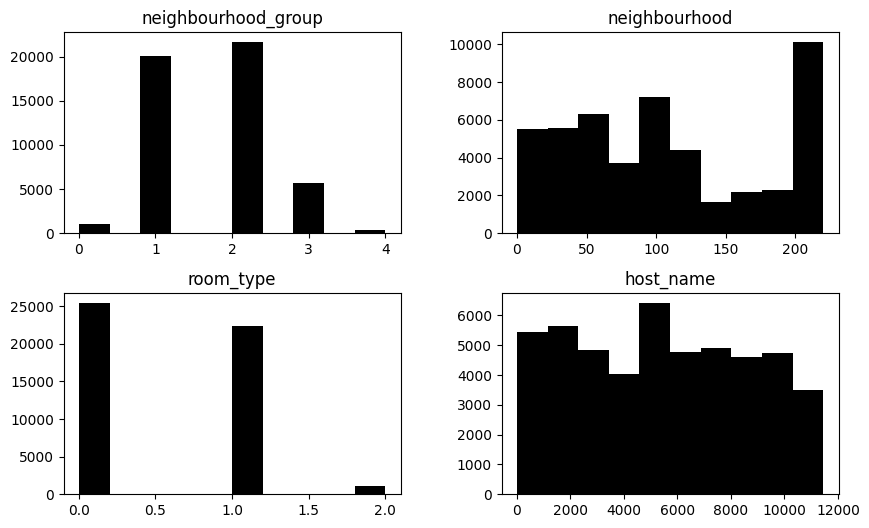

In [4]:
feature_encoders={}

for feature in categorical_features:
    encoder=LabelEncoder()
    data_df[feature]=encoder.fit_transform(data_df[feature])
    feature_encoders[feature]=encoder


data_df[categorical_features].hist(grid=False, figsize=[10,6], color='black')
plt.tight_layout
plt.show()

neighbourhood_group
2    21661
1    20104
3     5666
0     1091
4      373
Name: count, dtype: int64

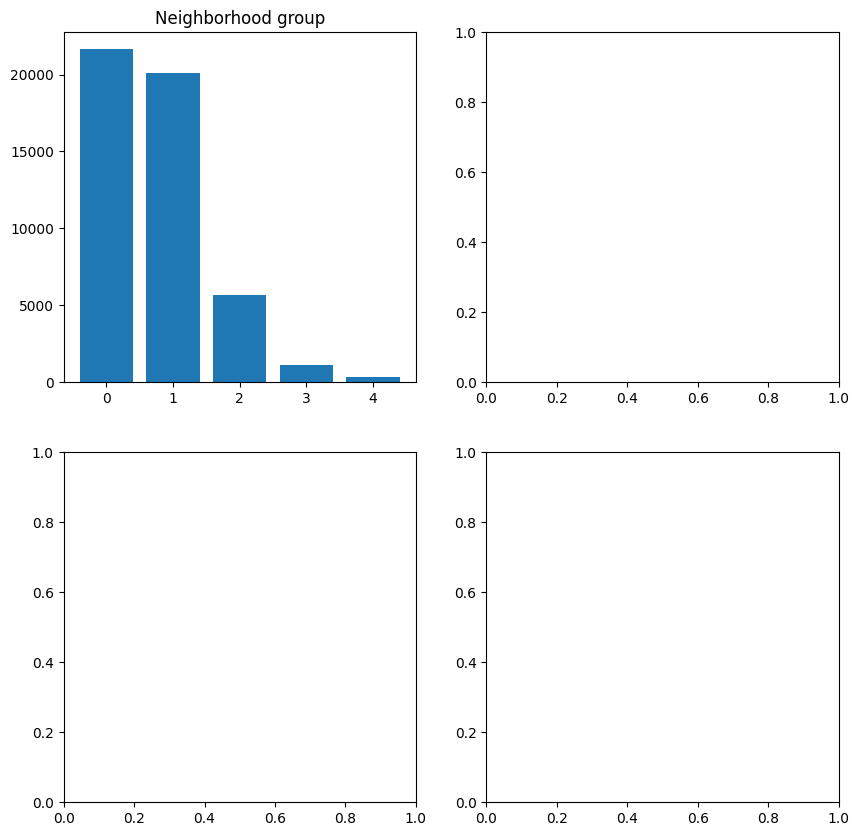

In [6]:
fig, axs=plt.subplots(2,2, figsize=(10,10))
axs=axs.flatten()

# Plot neighborhood group level counts
axs[0].set_title('Neighborhood group')
level_counts=data_df['neighbourhood_group'].value_counts()
axs[0].bar(list(range(len(level_counts))), level_counts)
level_counts

## 3. Numerical features

### 3.1. Descriptive statistics

In [ ]:
numeric_features=['latitude','longitude','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']

data_df[numeric_features].describe().transpose()

### 3.2 Distribution plots

In [ ]:
log_features=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
linear_features=['latitude','longitude']

data_df[linear_features].hist(grid=False, figsize=[10,3.5], color='black')
plt.tight_layout
plt.show()

data_df[log_features].hist(grid=False, figsize=[10.4,10], color='black', log=True)
plt.tight_layout
plt.show()